In [1]:
from io import open
import glob
import os
import unicodedata
import string
import random
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
print(glob.glob('datasets/data/names/*.txt'))

['datasets/data/names\\Arabic.txt', 'datasets/data/names\\Chinese.txt', 'datasets/data/names\\Czech.txt', 'datasets/data/names\\Dutch.txt', 'datasets/data/names\\English.txt', 'datasets/data/names\\French.txt', 'datasets/data/names\\German.txt', 'datasets/data/names\\Greek.txt', 'datasets/data/names\\Irish.txt', 'datasets/data/names\\Italian.txt', 'datasets/data/names\\Japanese.txt', 'datasets/data/names\\Korean.txt', 'datasets/data/names\\Polish.txt', 'datasets/data/names\\Portuguese.txt', 'datasets/data/names\\Russian.txt', 'datasets/data/names\\Scottish.txt', 'datasets/data/names\\Spanish.txt', 'datasets/data/names\\Vietnamese.txt']


In [3]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [4]:
n_letters

57

In [5]:
language_names = {}
all_languages = []

In [6]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn' and c in all_letters
    )

In [7]:
print(unicodeToAscii('Émile'))

Emile


In [8]:
def findFiles(path):
    return glob.glob(path)

In [9]:
total_names = 0

for filename in findFiles('datasets/data/names/*.txt'):
    language = os.path.splitext(os.path.basename(filename))[0]
    all_languages.append(language)
    read_names = open(filename, encoding='utf-8').read().strip().split('\n')
    names = [unicodeToAscii(line) for line in read_names]
    language_names[language] = names
    total_names += len(names)

In [10]:
all_languages

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [11]:
n_languages = len(all_languages)
n_languages

18

In [12]:
total_names

20074

In [13]:
print(language_names['Czech'][:5])

['Abl', 'Adsit', 'Ajdrna', 'Alt', 'Antonowitsch']


In [14]:
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][all_letters.find(letter)] = 1
    return tensor

In [15]:
print(letterToTensor('a'))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [16]:
print(letterToTensor('Z'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0.]])


In [17]:
def nameToTensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)
    for li, letter in enumerate(name):
        tensor[li][0][all_letters.find(letter)] = 1

    return tensor 

In [18]:
mary_tensor = nameToTensor('Mary')
mary_tensor.size()

torch.Size([4, 1, 57])

In [19]:
mary_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [20]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [21]:
n_hidden = 256
rnn = RNN(n_letters, n_hidden, n_languages)

In [22]:
inp = letterToTensor('C')
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(inp, hidden)
print('output size =', output.size())
print('next_hidden size=', next_hidden.size())

output size = torch.Size([1, 18])
next_hidden size= torch.Size([1, 256])


In [23]:
inp = nameToTensor('Charron')
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(inp[0], hidden)

In [24]:
print(output)

tensor([[-2.9083, -2.9369, -2.9151, -2.8441, -2.8965, -2.8256, -2.9369, -2.8743,
         -2.8360, -2.8475, -2.8292, -2.8374, -2.9367, -2.9522, -2.9219, -2.8859,
         -2.9339, -2.9249]], grad_fn=<LogSoftmaxBackward0>)


In [25]:
def languageFromOutput(output):
    _, top_i = output.topk(1)
    language_i = top_i[0].item()
    return all_languages[language_i], language_i

In [26]:
print(languageFromOutput(output))

('French', 5)


In [27]:
def randomTrainingExample():
    random_langague_index = random.randint(0, n_languages - 1)
    language = all_languages[random_langague_index]

    random_langague_names = language_names[language]
    name = random_langague_names[random.randint(0, len(random_langague_names) - 1)]
    
    language_tensor = torch.tensor([all_languages.index(language)], dtype=torch.long)
    name_tensor = nameToTensor(name)
    return language, name, language_tensor, name_tensor

In [28]:
for i in range(10):
    language, name,language_tensor, name_tensor = randomTrainingExample()
    print('language = ', language, ', name = ', name)

language =  Japanese , name =  Okuma
language =  Korean , name =  Shim
language =  Portuguese , name =  Coelho
language =  Spanish , name =  Zubizarreta
language =  Japanese , name =  Tankoshitsu
language =  Polish , name =  Bartosz
language =  Irish , name =  Power
language =  Chinese , name =  Wei
language =  Korean , name =  Ho
language =  Irish , name =  Mcmahon


In [29]:
criterion= nn.NLLLoss()
learning_rate = 0.005

In [30]:
def train(lannguage_tensor, name_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    loss = criterion(output, language_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [31]:
n_iters = 200000
current_loss = 0
all_losses = []

In [32]:
for epoch in range(1, n_iters + 1):
    language, name, language_tensor, name_tensor = randomTrainingExample()

    output, loss = train(language_tensor, name_tensor)
    current_loss += loss

    if epoch % 5000 == 0:
        guess, guess_i = languageFromOutput(output)
        correct = 'o' if guess == language else 'x (%s)' % language

        print('%d %d%% %.4f %s / %s %s' % (epoch, epoch / n_iters * 100, loss, name, guess, correct))

    if epoch % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

C:\Users\natha\AppData\Local\Temp\ipykernel_21764\163125262.py:11: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ..\torch\csrc\utils\python_arg_parser.cpp:1420.)
  p.data.add_(-learning_rate, p.grad.data)


5000 2% 2.4022 Acker / German o
10000 5% 1.6413 Gomulka / Polish o
15000 7% 2.2289 Sokal / Arabic x (Polish)
20000 10% 1.7831 Alvarado / Italian x (Spanish)
25000 12% 1.4402 Maloof / Arabic o
30000 15% 2.4086 Wasem / Dutch x (Arabic)
35000 17% 1.8310 Haddad / English x (Arabic)
40000 20% 0.5924 Sienkiewicz / Polish o
45000 22% 2.1627 Rahal / Irish x (Arabic)
50000 25% 3.2151 Garrastazu / Japanese x (Spanish)
55000 27% 0.5679 Conall / Irish o
60000 30% 0.0506 Callaghan / Irish o
65000 32% 0.2353 Biryulev / Russian o
70000 35% 1.8634 Bonhomme / French o
75000 37% 2.2653 Pinho / Korean x (Portuguese)
80000 40% 0.5053 Dertilis / Greek o
85000 42% 2.1766 Deniaud / Portuguese x (French)
90000 45% 0.7490 Di stefano / Italian o
95000 47% 1.9367 Voneve / English x (Czech)
100000 50% 1.3222 Curran / Irish o
105000 52% 0.9570 Castro / Portuguese o
110000 55% 0.5953 Brodeur / French o
115000 57% 1.7628 Ballalatak / Irish x (Czech)
120000 60% 4.9594 Sarkozi / Japanese x (French)
125000 62% 0.4905 S

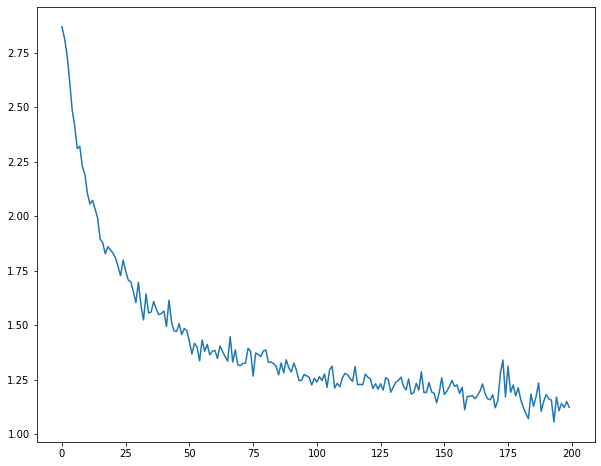

In [33]:
plt.figure(figsize=(10, 8))
plt.plot(all_losses)
plt.show()



In [34]:
n_predictions = 3

In [39]:
#input_name = 'Batsakis' #Greek, Russian, Japanese
#input_name = 'Amaya' #Japanese, Arabic, Portuguese
input_name = 'Bukoski' #Polish, Japanese, Russian

In [40]:
with torch.no_grad():
    name_tensor = nameToTensor(input_name)
    hidden = rnn.initHidden()
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    topv, topi = output.topk(n_predictions, 1, True)

    for i in range(n_predictions):
        value = topv[0][i].item()
        language_index = topi[0][i].item()

        print('(%.2f) %s' % (value, all_languages[language_index]))

(-0.07) Polish
(-3.40) Japanese
(-3.52) Russian
